
## Accessing through the Task class


### loading image


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline  

from asterism import data_dir
from asterism.core.image_manager.image import Image
from asterism.analysis_tasks.source_detection.background_estimation.background_estimation import DoSetBkgThreshTask
from asterism.analysis_tasks.source_detection.image_segmentation.image_segmentation import DoImageSegmentationTask
from asterism.analysis_tasks.source_detection.deblending.denclue_deblending import DoDENCLUEDeblendingTask
import  numpy as np

image=Image.from_fits_file(data_dir+'/deblending_img1.fits')

### bkg estimation


In [22]:
bkg_task=DoSetBkgThreshTask()
bkg_task.list_parameters()
bkg_task.set_par('plot',value=False)
bkg_task.set_par('skewness_range',value=0.1)
bkg_task.set_par('sub_block_frac_size',value=0.1)

|-------------------------------------------------------
|task: bkg_treshold
|
| par_name= sub_block_frac_size   value= 0.1   doc=  if provided, the bkg pixels are extracted from the sub-block with lowest integrated flux, having a size equal
                                          to sub_block_frac_size time the image size
| par_name= min_size_ratio   value= 0.1   doc=  provides the minimum size to stop the clipping in the skewness minimization
| par_name= n_std_th   value= 3.0   doc=  number of bakground deviation to set threshold, th=bkg_level+n_std_th*bkg_sig
| par_name= resampling_size   value= 1000000   doc=  if the image pixels number>resampling_size,
                                            then a random resampling of pixels is performed, with a final number= resampling_size
| par_name= skewness_range   value= 0.1   doc=  if not None, |skewness| is minimized in the range |bkg_lvl,bgk_lvl+skewness_range*bkg_std| 
| par_name= plot   value= False   doc=  
| par_name= verbose  

In [23]:
bkg_threshold,bkg_mode,bkg_sig=bkg_task.run(image=image)

|------------------------------
| Task: bkg_treshold Start
|------------------------------
|setting threshold
|image flux min 0.0 image flux max 9.71633911133
|using sub blocks
|sub blocks grid built
|sub block side 31
|sub blocks Num 9
|-
|skewness minimization 961
|flux bkg array  min,max 0.0886840820312 0.458374023438
|minimization of |skewness|
|initial skewness 0.160161054539
|initial mean 0.250037394255
|initial std 0.0593948364258
|range of threshold for skewness minimization th_skew in [0.244098,0.255977]
|start size:  961 0.250037394255 0.0593948364258 0.160161054539 961
|min skewness=0.000577 for th_skew=0.062649
|size ratio=0.706556, min_size ratio=0.100000
|-
|bkg_lvl 0.248482923269
|bkg_std 0.0411071777344
|bkg_th 0.371804456472
0.371804456472 0.248482923269 0.0411071777344


### image segmenetation


In [24]:
image_seg_task=DoImageSegmentationTask()
image_seg_task.list_parameters()

|-------------------------------------------------------
|task: image_segmentation
|
| par_name= dbscan_buffer_size   value= None   doc=  size of the dbscan buffer
| par_name= dbscan_eps   value= 1.5   doc=  eps dbscan par
| par_name= method   value= dbscan_binned   doc=  method: dbscan or dbscan_binned, from_seg_map
| par_name= verbose   value= False   doc=  set  verbosity on
| par_name= plot_dbscan   value= False   doc=  plot dbscan
| par_name= max_image_size   value= 1000000   doc=  
| par_name= use_only_central_sub_stamp   value= False   doc=  None
| par_name= min_sub_stamp_size   value= 25   doc=  
| par_name= bkg_threshold   value= None   doc=  
| par_name= K   value= None   doc=  density th for dbscan 
| par_name= K_pix   value= False   doc=  density th per pixel for dbscan
| par_name= seg_map_bkg_val   value= 0.0   doc=  
|-------------------------------------------------------


In [25]:
image_seg_task.set_par('bkg_threshold',value=float(bkg_threshold))
image_seg_task.set_par('K',value=1.5)
image_seg_task.set_par('K_pix',value=True)
image_seg_task.set_par('plot_dbscan',value=True)

|-------------------------------------------------------
|task: image_segmentation
|
| par_name= dbscan_buffer_size   value= None   doc=  size of the dbscan buffer
| par_name= dbscan_eps   value= 1.5   doc=  eps dbscan par
| par_name= method   value= dbscan_binned   doc=  method: dbscan or dbscan_binned, from_seg_map
| par_name= verbose   value= False   doc=  set  verbosity on
| par_name= plot_dbscan   value= True   doc=  plot dbscan
| par_name= max_image_size   value= 1000000   doc=  
| par_name= use_only_central_sub_stamp   value= False   doc=  None
| par_name= min_sub_stamp_size   value= 25   doc=  
| par_name= bkg_threshold   value= 0.371804456472   doc=  
| par_name= K   value= 1.5   doc=  density th for dbscan 
| par_name= K_pix   value= True   doc=  density th per pixel for dbscan
| par_name= seg_map_bkg_val   value= 0.0   doc=  
|-------------------------------------------------------
|------------------------------
| Task: image_segmentation Start
|----------------------------

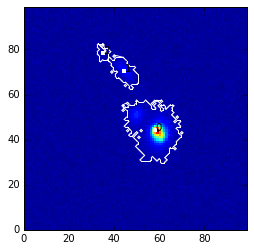

In [26]:
image_seg_task.list_parameters()

clusters_list,K,selected_coords=image_seg_task.run(image=image)

### denclue deblending


In [27]:
deblendig=DoDENCLUEDeblendingTask()
deblendig.list_parameters()

|-------------------------------------------------------
|task: denclue_deblending
|
| par_name= do_denclue_deblending   value= False   doc=  if True, the denclue deblending is performed
| par_name= gl_downsampling   value= False   doc=  plot 
| par_name= eps   value= 0.01   doc=  eps dbscan par
| par_name= digitize_attractors   value= False   doc=  digitize attarctors 
| par_name= kernel   value= gauss   doc=  smoothing  kernel
| par_name= k_table_size   value= None   doc=  if>0 a lookup table of the kernel is used
| par_name= h_frac   value= 0.2   doc=  kernel width as a fraction of parent cluster radius
| par_name= h_min   value= 1.0   doc=  minim width of the kernel
| par_name= mask_unchanged   value= None   doc=  th value to flag and attractor as unchanged
| par_name= min_size   value= 9   doc=  minimum size in pixels,  of cluster to deblend
| par_name= attr_dbs_eps   value= 1.0   doc=  eps for dbscan of attractors
| par_name= attr_dbs_K   value= 4.0   doc=  K for dbscan of attrac

In [28]:
deblendig.set_par('do_denclue_deblending',value=True)
deblendig.set_par('gl_downsampling',value=False)
deblendig.set_par('h_frac',value=0.1)
deblendig.set_par('plot',value=True)
deblendig.set_par('verbose',value=True)

|------------------------------
| Task: denclue_deblending Start
|------------------------------
|-
|debelnding for cluster 0 r_cluter 9.10082669322 r_max 16.8050178165
|eps 0.01
|h 1.91110876276
|denclue
|R_max [ 9.19206967]
|running denclue with
|kernel  gauss
|h  1.91110876276
|eps 0.01
|R_max set to [ 9.19206967]
| find attractors
|position array size  470
|target position array size  470
|comp. time 0.351810216904
|denclue done
|dbs cl=0, x_c=16.478850, y_c=13.835445
|dbs cl=1, x_c=6.880669, y_c=21.850691


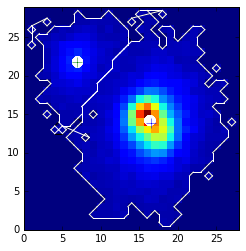

| analysing sub clusters for parent cluster 0
->ID, 0 0 70.0 57.0
->ID, 1 1 56.0 57.0
| children  clusters validated 2
|-


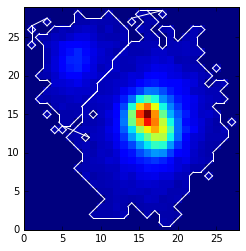

|-
|debelnding for cluster 1 r_cluter 4.66908942296 r_max 8.69104489385
|eps 0.01
|h 1.0
|denclue
|R_max [ 4.80980981]
|running denclue with
|kernel  gauss
|h  1.0
|eps 0.01
|R_max set to [ 4.80980981]
| find attractors
|position array size  101
|target position array size  101
|comp. time 0.204625844955
|denclue done
|dbs cl=0, x_c=7.587454, y_c=8.303403


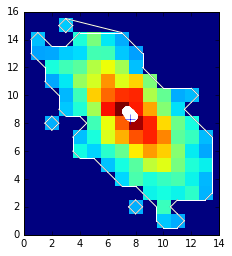

|-


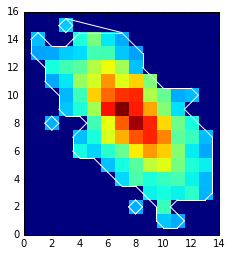

|-
|debelnding for cluster 2 r_cluter 2.40607019623 r_max 4.11627970058
|eps 0.01
|h 1.0
|denclue
|R_max [ 4.80980981]
|running denclue with
|kernel  gauss
|h  1.0
|eps 0.01
|R_max set to [ 4.80980981]
| find attractors
|position array size  27
|target position array size  27
|comp. time 0.026636838913
|denclue done
|dbs cl=0, x_c=3.068918, y_c=4.376034


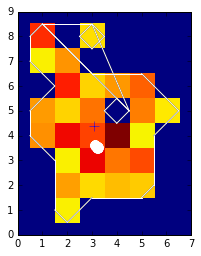

|-


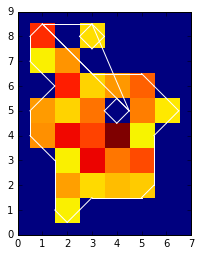

|N final clusters= 4


In [29]:
deblendig.run(clusters_list=clusters_list)

## Accessing directly the do_denclue_deblending()

In [30]:
from asterism import data_dir
from asterism.core.image_manager.image import Image
from asterism.analysis_tasks.source_detection.background_estimation.background_estimation import set_thresh
from asterism.analysis_tasks.source_detection.image_segmentation.image_segmentation import do_image_segmentation
from asterism.analysis_tasks.source_detection.deblending.denclue_deblending import do_denclue_deblending

image=Image.from_fits_file(data_dir+'/deblending_img1.fits')

In [31]:
bkg_threshold,bkg_mode,bkg_sig=set_thresh(image,sub_block_frac_size=0.1,skewness_range=0.1,plot=False)

|setting threshold
|image flux min 0.0 image flux max 9.71633911133
|using sub blocks
|sub blocks grid built
|sub block side 31
|sub blocks Num 9
|-
|skewness minimization 961
|flux bkg array  min,max 0.0886840820312 0.458374023438
|minimization of |skewness|
|initial skewness 0.160161054539
|initial mean 0.250037394255
|initial std 0.0593948364258
|range of threshold for skewness minimization th_skew in [0.244098,0.255977]
|start size:  961 0.250037394255 0.0593948364258 0.160161054539 961
|min skewness=0.000577 for th_skew=0.062649
|size ratio=0.706556, min_size ratio=0.100000
|-
|bkg_lvl 0.248482923269
|bkg_std 0.0411071777344
|bkg_th 0.371804456472


|method dbscan_binned
|K, 0.557706684708
|bkg th 0.371804456472


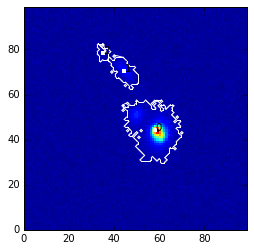

In [32]:
clusters_list,K,selected_coords=do_image_segmentation(image,bkg_threshold,K=np.float_(1.5),K_pix=True,plot_dbscan=True)

### denclue deblendings

|-
|debelnding for cluster 0 r_cluter 9.10082669322 r_max 16.8050178165
|downsampling start
|local maxima [[16 15]
 [ 7 22]]
|downsamplig done
|denclue
|R_max 9.10082669322
|comp. time 0.203984022141
|denclue done
|dbs cl=0, x_c=15.725288, y_c=13.834126
|dbs cl=1, x_c=7.494492, y_c=21.850731


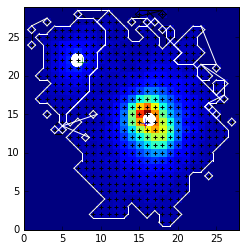

->ID, 0 0 69.0 57.0
->ID, 1 1 70.0 56.0
| children  clusters validated 2
|-


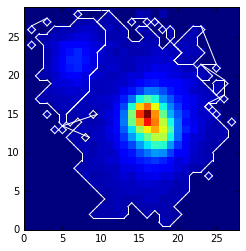

|-
|debelnding for cluster 1 r_cluter 4.66908942296 r_max 8.69104489385
|downsampling start
|local maxima [[ 7  9]
 [ 5 14]
 [10  2]]
|downsamplig done
|denclue
|R_max 4.66908942296
|comp. time 0.0675599575043
|denclue done
|dbs cl=0, x_c=6.874224, y_c=8.803077
|dbs cl=1, x_c=11.464534, y_c=5.122089


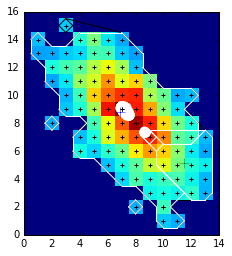

->ID, 0 0 49.0 76.0
->ID, 1 1 50.0 69.0
| children  clusters validated 2
|-


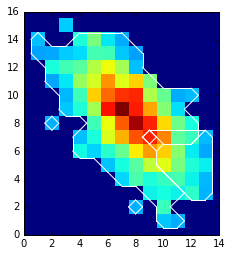

|-
|debelnding for cluster 2 r_cluter 2.40607019623 r_max 4.11627970058
|downsampling start
|local maxima [[3 4]
 [1 8]
 [2 6]
 [5 6]]
|downsamplig done
|denclue
|R_max 2.40607019623
|comp. time 0.00781488418579
|denclue done
|dbs cl=0, x_c=3.434386, y_c=3.820863


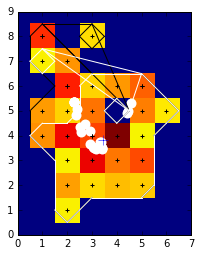

|-


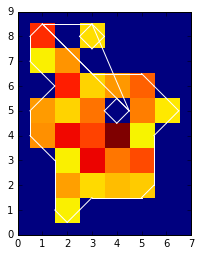

|N final clusters= 5


In [33]:
do_denclue_deblending(clusters_list=clusters_list,do_denclue_deblending=True,gl_downsampling=True,h_frac=0.1,plot=True)